In [268]:
import pandas as pd
import geopandas as gpd

In [269]:

df= pd.read_csv('country_visit_counts.csv')

In [270]:
df

,country,count_visit
0,United States,10
1,Japan,7
2,Russia,7
3,Germany,6
4,United Arab Emirates,6
...,...,...
71,Uganda,1
72,Ghana,1
73,Sweden,1
74,Jordan,1


In [271]:
df.shape

(76, 2)

In [272]:
df = df.sort_values(by='country')


In [273]:
df.country.unique()

array(['Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belgium', 'Bhutan', 'Brazil', 'Brunei', 'Canada', 'China',
       'Croatia', 'Cyprus', 'Denmark', 'Egypt', 'Fiji', 'France',
       'Germany', 'Ghana', 'Greece', 'Guyana', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Malaysia', 'Maldives',
       'Mauritius', 'Mexico', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Netherlands', 'Nigeria', 'Oman', 'Pakistan',
       'Palestine', 'Papua New Guinea', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Russia', 'Rwanda', 'Saudi Arabia',
       'Seychelles', 'Singapore', 'South Africa', 'South Korea', 'Spain',
       'Sri Lanka', 'Sweden', 'Switzerland', 'Tajikistan', 'Tanzania',
       'Thailand', 'Trinidad & Tobago', 'Turkey', 'Turkmenistan',
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uzbekista

In [274]:
gdf = gpd.read_file("geo.json")

In [275]:
dfvdfvfd

NameError: name 'dfvdfvfd' is not defined

In [276]:
gdf

,NAME,NAME_LONG,ABBREV,FORMAL_EN,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,GDP_YEAR,ISO_A2,ISO_A3,CONTINENT,REGION_UN,SUBREGION,geometry
0,Afghanistan,Afghanistan,Afg.,Islamic State of Afghanistan,34124811,15,64080.0,2017,2016,AF,AFG,Asia,Asia,Southern Asia,"POLYGON ((61.2061 35.64835, 60.8064 34.40431, ..."
1,Angola,Angola,Ang.,People's Republic of Angola,29310273,15,189000.0,2017,2016,AO,AGO,Africa,Africa,Middle Africa,"MULTIPOLYGON (((23.21393 -17.5207, 22.5618 -16..."
2,Albania,Albania,Alb.,Republic of Albania,3047987,12,33900.0,2017,2016,AL,ALB,Europe,Europe,Southern Europe,"POLYGON ((21.02612 40.84514, 20.60539 41.08415..."
3,United Arab Emirates,United Arab Emirates,U.A.E.,United Arab Emirates,6072475,13,667200.0,2017,2016,AE,ARE,Asia,Asia,Western Asia,"POLYGON ((51.58184 24.2436, 51.62391 24.01073,..."
4,Argentina,Argentina,Arg.,Argentine Republic,44293293,15,879400.0,2017,2016,AR,ARG,South America,Americas,South America,"MULTIPOLYGON (((-66.95962 -54.89715, -66.45474..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Vanuatu,Vanuatu,Van.,Republic of Vanuatu,282814,10,723.0,2017,2016,VU,VUT,Oceania,Oceania,Melanesia,"MULTIPOLYGON (((167.85134 -16.46663, 167.22024..."
173,Yemen,Yemen,Yem.,Republic of Yemen,28036829,15,73450.0,2017,2016,YE,YEM,Asia,Asia,Western Asia,"POLYGON ((51.99205 19.00391, 49.11003 18.61783..."
174,South Africa,South Africa,S.Af.,Republic of South Africa,54841552,16,739100.0,2017,2016,ZA,ZAF,Africa,Africa,Southern Africa,"POLYGON ((19.89014 -24.76434, 19.89014 -28.459..."
175,Zambia,Zambia,Zambia,Republic of Zambia,15972000,14,65170.0,2017,2016,ZM,ZMB,Africa,Africa,Eastern Africa,"POLYGON ((23.21393 -17.5207, 24.03436 -17.3000..."


In [277]:
gdf = gdf.sort_values(by='NAME_LONG')


In [283]:
gdf.NAME_LONG.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       'Dem. Rep. Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Southern and Antarctic Lands', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', '

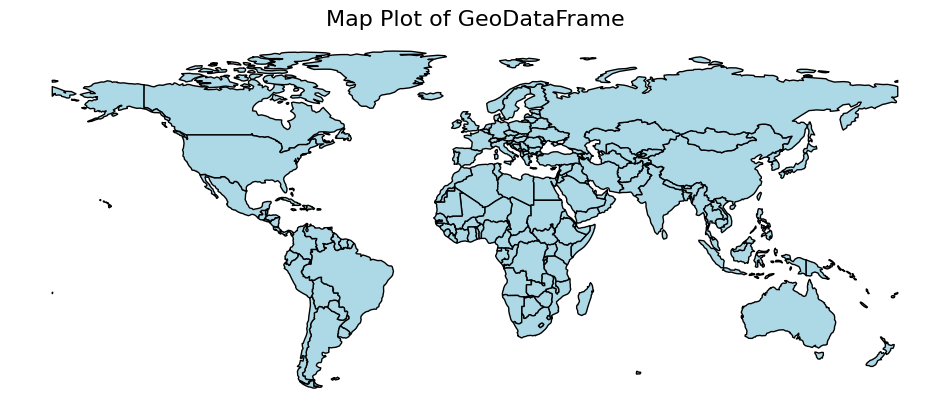

In [282]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plotting the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, edgecolor='black', facecolor='lightblue')
ax.set_title('Map Plot of GeoDataFrame', fontsize=16)
plt.axis('off')
plt.show()


In [279]:
gdf = gdf[gdf['NAME_LONG']!= 'Antarctica']

In [280]:
# Strip and sort
df['country'] = df['country'].str.strip()
gdf['NAME_LONG'] = gdf['NAME_LONG'].str.strip()

# Unique values
df_c = set(df['country'].unique())
gdf_c = set(gdf['NAME_LONG'].unique())


In [281]:
# Districts in df but not in gdf
extra_in_df = df_c - gdf_c
print("Districts in df but not in gdf:", extra_in_df)

# Districts in gdf but not in df
extra_in_gdf = gdf_c - df_c
print("Districts in gdf but not in df:", extra_in_gdf)


Districts in df but not in gdf: {'Russia', 'South Korea', 'Laos', 'Mauritius', 'Seychelles', 'Brunei', 'Maldives', 'Singapore', 'Trinidad & Tobago'}
Districts in gdf but not in df: {'Finland', 'Belize', 'Libya', 'Guatemala', 'Botswana', 'Jamaica', 'Venezuela', 'Guinea', 'Tunisia', 'Vanuatu', 'Iceland', "Côte d'Ivoire", 'French Southern and Antarctic Lands', 'Zimbabwe', 'Montenegro', 'Solomon Islands', 'Macedonia', 'Lithuania', 'Georgia', 'Haiti', 'Costa Rica', 'Niger', 'Panama', 'Serbia', 'Falkland Islands', 'Czech Republic', 'Lao PDR', 'Somaliland', 'Taiwan', 'Republic of Korea', 'Latvia', 'Uruguay', 'Cambodia', 'Democratic Republic of the Congo', 'Western Sahara', 'Benin', 'Cuba', 'Bahamas', 'Bulgaria', 'Moldova', 'Colombia', 'Paraguay', 'Slovenia', 'Togo', 'New Caledonia', 'Eritrea', 'Angola', 'Chile', 'Lesotho', 'Central African Republic', 'Lebanon', 'Puerto Rico', 'Bolivia', 'Malawi', 'Brunei Darussalam', 'Peru', 'Northern Cyprus', 'Nicaragua', 'Azerbaijan', 'Russian Federation', 

In [ ]:
df['country'] = df['country'].replace({
    'Russia': 'Russian Federation',
    'South Korea': 'Republic of Korea',,
    'Trinidad & Tobago': 'Trinidad and Tobago'
})


In [ ]:
merged_gdf = gdf.merge(df, how='left', left_on='sovereignt', right_on='country')


In [ ]:
merged_gdf['count_visit'] = merged_gdf['count_visit'].fillna(0).astype(int)


In [ ]:
merged_gdf.count_visit.unique()

array([ 2,  0,  1,  3,  4,  5,  6,  7, 10])

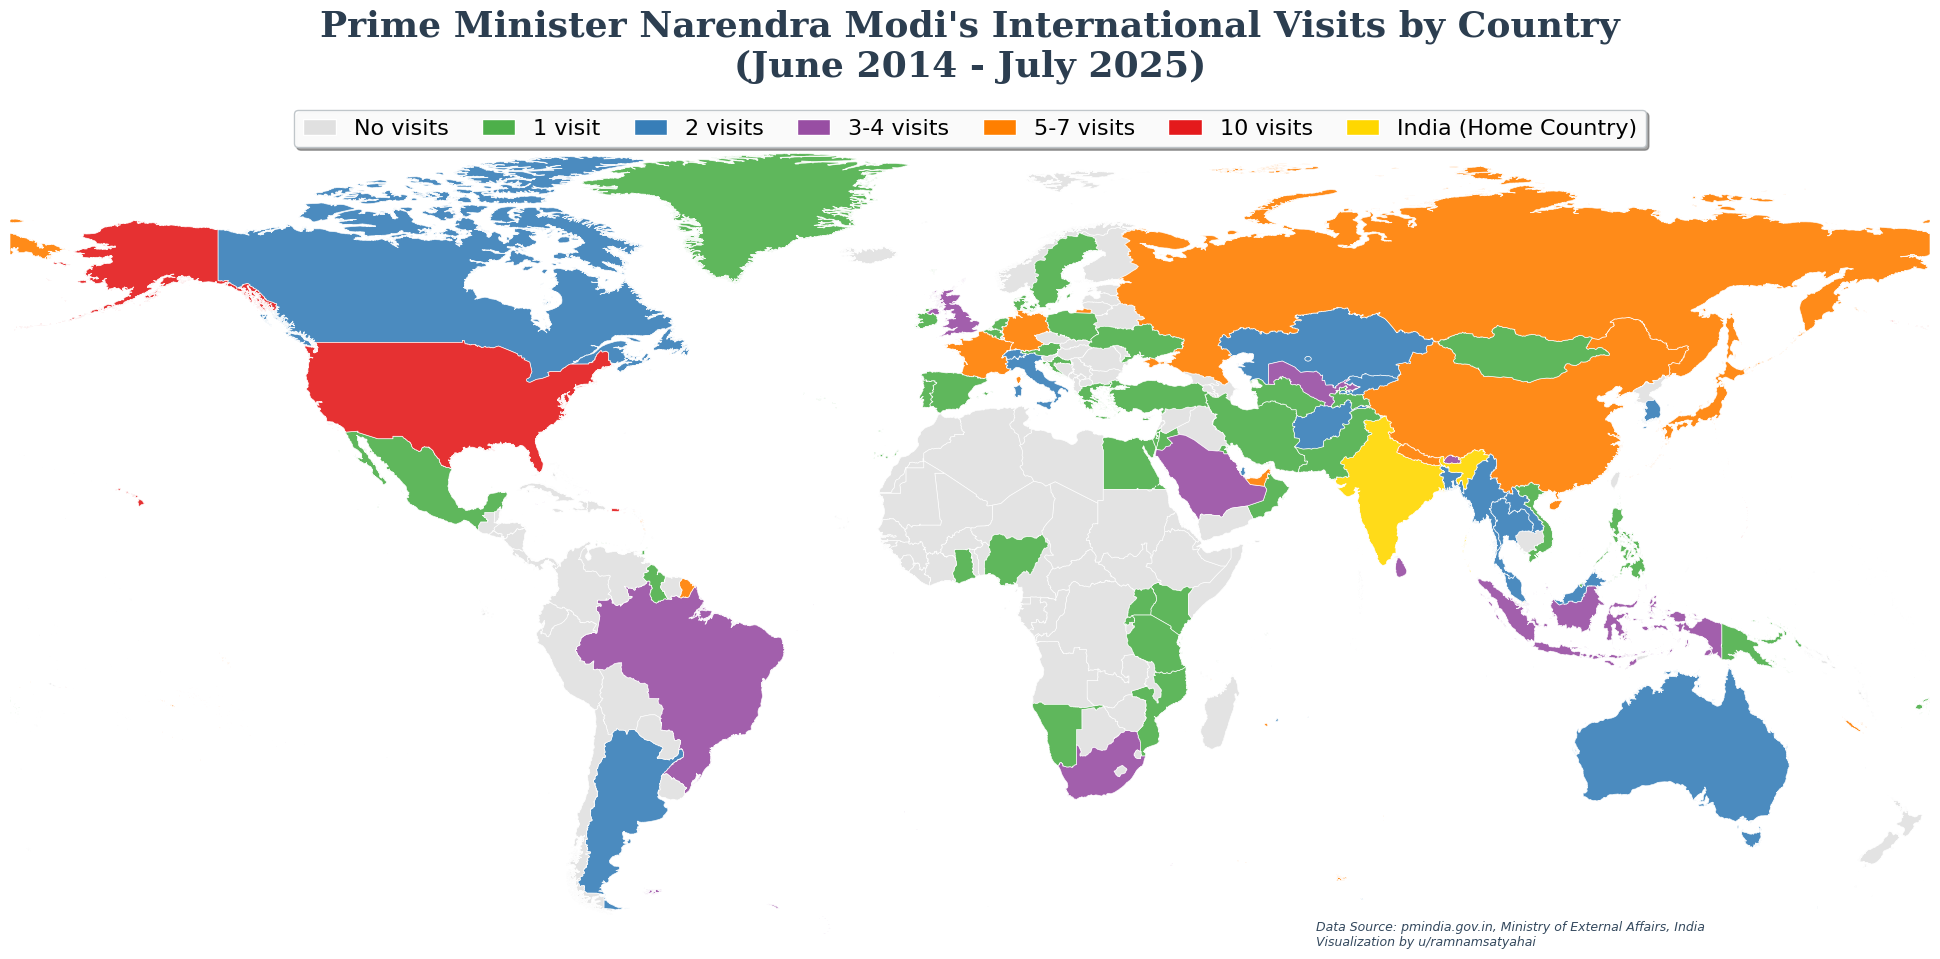

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Define visit bins and labels
visit_counts = [0, 1, 2, 3, 4, 5, 6, 7, 10]
bins = [0, 1, 2, 3, 5, 8, 11]  # Bin edges: 0, 1, 2, 3-4, 5-7, 8+
bin_labels = ['No visits', '1 visit', '2 visits', '3-4 visits', '5-7 visits', '10 visits']

# Create bins for the data
merged_gdf['visit_bins'] = pd.cut(merged_gdf['count_visit'], 
                                  bins=bins, 
                                  labels=bin_labels, 
                                  include_lowest=True, 
                                  right=False)



colors = {
    'No visits': '#e0e0e0',      # Light neutral gray
    '1 visit': '#4daf4a',        # Vibrant green
    '2 visits': '#377eb8',       # Strong blue
    '3-4 visits': '#984ea3',     # Deep purple
    '5-7 visits': '#ff7f00',     # Bright orange
    '10 visits': '#e41a1c',      # Bright red
    'India': '#FFD700'           # Gold for home country
}

# Create color column based on bins
def assign_color(row):
    # Check if this is India using the sovereignt column
    if row['sovereignt'] == 'India':
        return colors['India']
    else:
        return colors[row['visit_bins']]

merged_gdf['plot_color'] = merged_gdf.apply(assign_color, axis=1)

# Create the enhanced plot
plt.style.use('default')
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Plot the map
merged_gdf.plot(ax=ax, 
                color=merged_gdf['plot_color'], 
                edgecolor='white', 
                linewidth=0.5,
                alpha=0.9)

# Customize the plot with serif font
ax.set_title('Prime Minister Narendra Modi\'s International Visits by Country\n(June 2014 - July 2025)', 
             fontsize=26, fontweight='bold', pad=50, color='#2c3e50', fontfamily='serif')

# Remove axes
ax.set_xlim(-180, 180)
ax.set_ylim(-60, 85)
ax.axis('off')

# Create custom legend
legend_elements = []
for label, color in colors.items():
    if label != 'India':  # We'll add India separately
        legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='white', linewidth=1, label=label))

# Add India to legend
legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=colors['India'], edgecolor='white', linewidth=1, label='India (Home Country)'))

# Add horizontal legend below title
legend = ax.legend(handles=legend_elements, 
                  loc='upper center', 
                  bbox_to_anchor=(0.5, 1.06),
                  ncol=len(legend_elements),
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  fontsize=16,
                  columnspacing=1.5,
                  handlelength=1.5)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_edgecolor('#bdc3c7')
legend.get_frame().set_linewidth(1)

# Add a cool background gradient
ax.set_facecolor('#e8f4f8')  # Light blue-gray background

# Add data source note
ax.text(0.68, 0.02, 'Data Source: pmindia.gov.in, Ministry of External Affairs, India\nVisualization by u/ramnamsatyahai', 
        transform=ax.transAxes, fontsize=9, style='italic',
        verticalalignment='top', color='#34495e', fontweight='light')

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.05, left=0.02, right=0.98)
plt.show()



In [ ]:
merged_gdf.columns

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_nl', 'fclass_se', 'fclass_bd', 'fclass_ua', 'filename',
       'geometry', 'country', 'count_visit', 'visit_bins', 'plot_color'],
      dtype='object', length=174)